In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.svm import SVR
from matplotlib.colors import ListedColormap

In [3]:
test=pd.read_csv("Testing.csv") 
train=pd.read_csv("Training.csv")

In [4]:
train.sample(n=1)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
3735,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [5]:
data = pd.concat([train, test])

In [6]:
data.sample(10)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
4468,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo
4265,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
4062,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
2920,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma
3249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypertension
1854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis C
4424,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
2385,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypoglycemia
1431,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis B
4326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hepatitis C


In [7]:
data.head(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [8]:
data.tail(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
37,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
38,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
39,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis
40,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,Impetigo


In [9]:
data.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

In [10]:
data.shape

(4961, 133)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4961 entries, 0 to 40
Columns: 133 entries, itching to prognosis
dtypes: int64(132), object(1)
memory usage: 5.1+ MB


<AxesSubplot:title={'center':'skin_rash'}, xlabel='itching'>

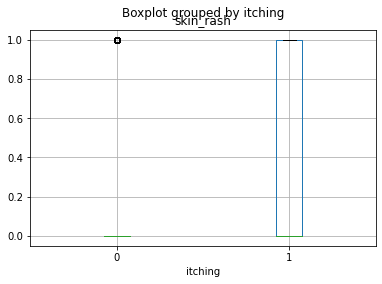

In [12]:
data.boxplot(column ='skin_rash', by='itching')

<AxesSubplot:>

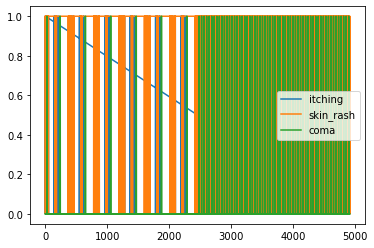

In [13]:
data1 =data.loc[:,["itching","skin_rash","coma"] ]
data1.plot()

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

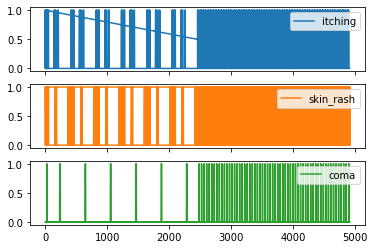

In [14]:

data1.plot(subplots =True)

<AxesSubplot:xlabel='depression', ylabel='muscle_pain'>

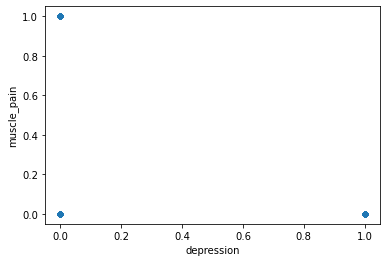

In [15]:
data.plot(kind= "scatter",x="depression", y="muscle_pain")

<AxesSubplot:ylabel='Frequency'>

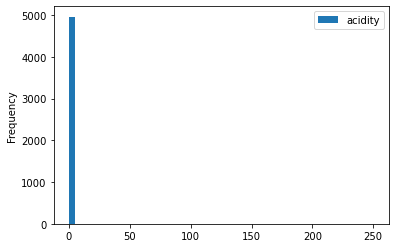

In [16]:
data.plot(kind="hist", y="acidity", bins = 50, range=(0,250))

In [17]:
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

X, y=data.iloc[:,:-1], data.iloc[:,-1]

#Spliting the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [19]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [20]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [21]:
feature_imp = pd.Series(clf.feature_importances_,index=list(data.columns[:-1])).sort_values(ascending=False).head(50)
feature_imp[::-1]

red_sore_around_nose        0.008224
weakness_in_limbs           0.008263
bladder_discomfort          0.008456
ulcers_on_tongue            0.008469
watering_from_eyes          0.008593
increased_appetite          0.008608
movement_stiffness          0.008611
painful_walking             0.008711
stiff_neck                  0.008742
internal_itching            0.008781
unsteadiness                0.008874
abnormal_menstruation       0.008915
fast_heart_rate             0.009033
loss_of_balance             0.009137
headache                    0.009197
back_pain                   0.009297
cough                       0.009342
yellow_crust_ooze           0.009344
chills                      0.009471
coma                        0.009779
spotting_ urination         0.010115
stomach_pain                0.010123
weight_loss                 0.010231
mucoid_sputum               0.010323
pain_behind_the_eyes        0.010714
stomach_bleeding            0.010777
red_spots_over_body         0.010816
t

In [22]:
feature_imp[::-1].index

Index(['red_sore_around_nose', 'weakness_in_limbs', 'bladder_discomfort',
       'ulcers_on_tongue', 'watering_from_eyes', 'increased_appetite',
       'movement_stiffness', 'painful_walking', 'stiff_neck',
       'internal_itching', 'unsteadiness', 'abnormal_menstruation',
       'fast_heart_rate', 'loss_of_balance', 'headache', 'back_pain', 'cough',
       'yellow_crust_ooze', 'chills', 'coma', 'spotting_ urination',
       'stomach_pain', 'weight_loss', 'mucoid_sputum', 'pain_behind_the_eyes',
       'stomach_bleeding', 'red_spots_over_body', 'toxic_look_(typhos)',
       'yellowish_skin', 'continuous_feel_of_urine', 'rusty_sputum',
       'chest_pain', 'muscle_weakness', 'abdominal_pain', 'yellowing_of_eyes',
       'sweating', 'joint_pain', 'loss_of_appetite', 'fatigue',
       'family_history', 'vomiting', 'high_fever', 'altered_sensorium',
       'diarrhoea', 'dark_urine', 'lack_of_concentration', 'mild_fever',
       'nausea', 'muscle_pain', 'itching'],
      dtype='object')

No handles with labels found to put in legend.


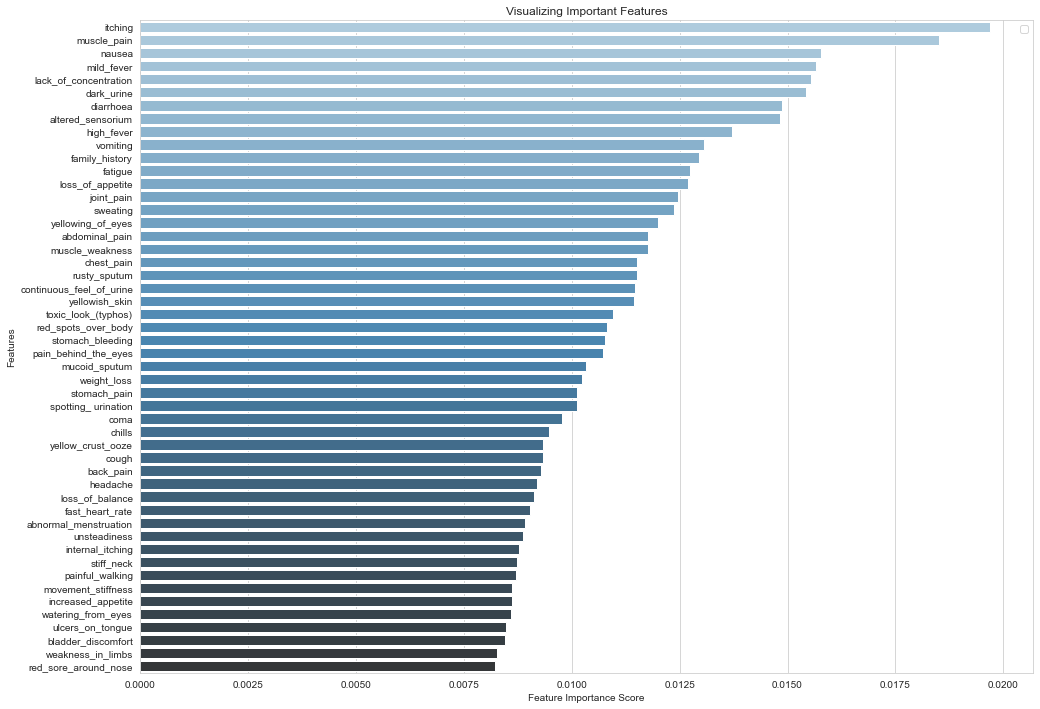

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.gcf()
fig.set_size_inches(16, 12)

# Creating a bar plot
sns.set_style("whitegrid")
sns.barplot(x=feature_imp, y=feature_imp.index, palette='Blues_d',color='white')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [24]:
X_reduced, y = data[['receiving_blood_transfusion', 'red_sore_around_nose',
       'abnormal_menstruation', 'continuous_sneezing', 'breathlessness',
       'blackheads', 'shivering', 'dizziness', 'back_pain', 'unsteadiness',
       'yellow_crust_ooze', 'muscle_weakness', 'loss_of_balance', 'chills',
       'ulcers_on_tongue', 'stomach_bleeding', 'lack_of_concentration', 'coma',
       'neck_pain', 'weakness_of_one_body_side', 'diarrhoea',
       'receiving_unsterile_injections', 'headache', 'family_history',
       'fast_heart_rate', 'pain_behind_the_eyes', 'sweating', 'mucoid_sputum',
       'spotting_ urination', 'sunken_eyes', 'dischromic _patches', 'nausea',
       'dehydration', 'loss_of_appetite', 'abdominal_pain', 'stomach_pain',
       'yellowish_skin', 'altered_sensorium', 'chest_pain', 'muscle_wasting',
       'vomiting', 'mild_fever', 'high_fever', 'red_spots_over_body',
       'dark_urine', 'itching', 'yellowing_of_eyes', 'fatigue', 'joint_pain',
       'muscle_pain']], data.iloc[:,-1]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3) # 70% training and 30% test
X_reduced.head()

,receiving_blood_transfusion,red_sore_around_nose,abnormal_menstruation,continuous_sneezing,breathlessness,blackheads,shivering,dizziness,back_pain,unsteadiness,...,vomiting,mild_fever,high_fever,red_spots_over_body,dark_urine,itching,yellowing_of_eyes,fatigue,joint_pain,muscle_pain
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
clf2=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train,y_train)

y_pred=clf2.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9408999328408327


In [26]:
feature_imp2 = pd.Series(clf2.feature_importances_,index=list(X_reduced.columns)).sort_values(ascending=False)
feature_imp2[::-1]

pain_behind_the_eyes              0.008017
dehydration                       0.008505
weakness_of_one_body_side         0.009180
receiving_blood_transfusion       0.009354
continuous_sneezing               0.009788
red_sore_around_nose              0.010338
stomach_bleeding                  0.010791
sunken_eyes                       0.011160
receiving_unsterile_injections    0.011237
back_pain                         0.013098
ulcers_on_tongue                  0.013298
coma                              0.013314
red_spots_over_body               0.013370
shivering                         0.014068
yellow_crust_ooze                 0.014343
mucoid_sputum                     0.014479
altered_sensorium                 0.014669
lack_of_concentration             0.014681
stomach_pain                      0.015482
unsteadiness                      0.015735
loss_of_balance                   0.016384
breathlessness                    0.016650
dischromic _patches               0.016901
dark_urine 

No handles with labels found to put in legend.


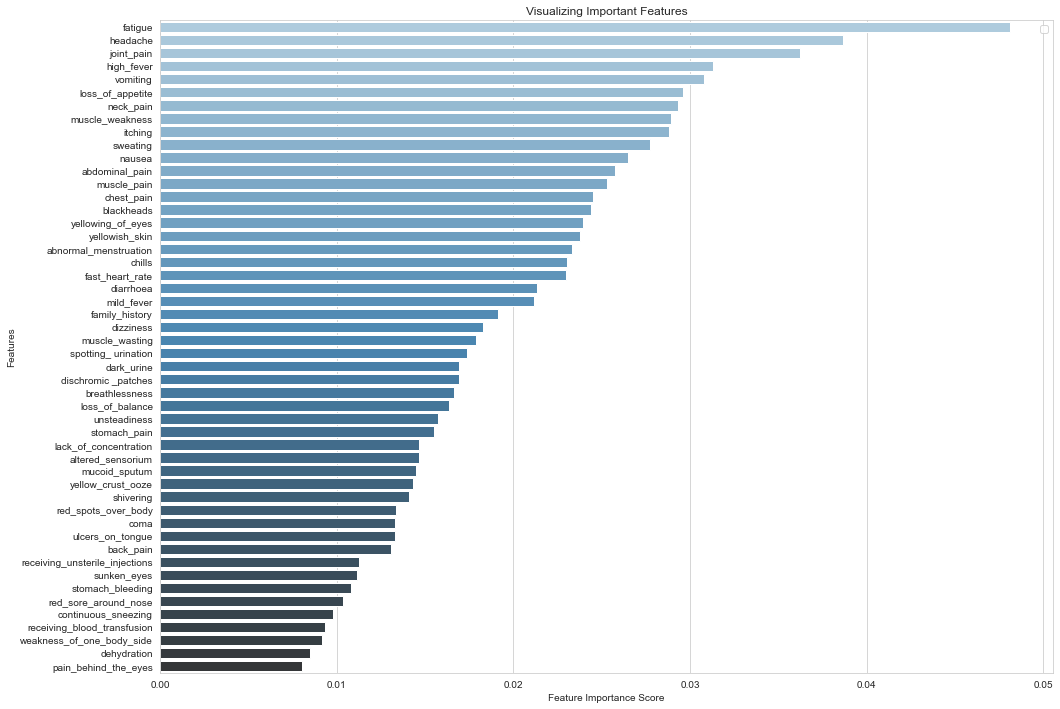

In [27]:
fig = plt.gcf()
fig.set_size_inches(16, 12)

# Creating a bar plot
sns.set_style("whitegrid")
sns.barplot(x=feature_imp2, y=feature_imp2.index, palette='Blues_d',color='white')

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


In [28]:
data['prognosis'].value_counts(normalize = True)

Fungal infection                           0.02439
Hepatitis C                                0.02439
Hepatitis E                                0.02439
Alcoholic hepatitis                        0.02439
Tuberculosis                               0.02439
Common Cold                                0.02439
Pneumonia                                  0.02439
Dimorphic hemmorhoids(piles)               0.02439
Heart attack                               0.02439
Varicose veins                             0.02439
Hypothyroidism                             0.02439
Hyperthyroidism                            0.02439
Hypoglycemia                               0.02439
Osteoarthristis                            0.02439
Arthritis                                  0.02439
(vertigo) Paroymsal  Positional Vertigo    0.02439
Acne                                       0.02439
Urinary tract infection                    0.02439
Psoriasis                                  0.02439
Hepatitis D                    

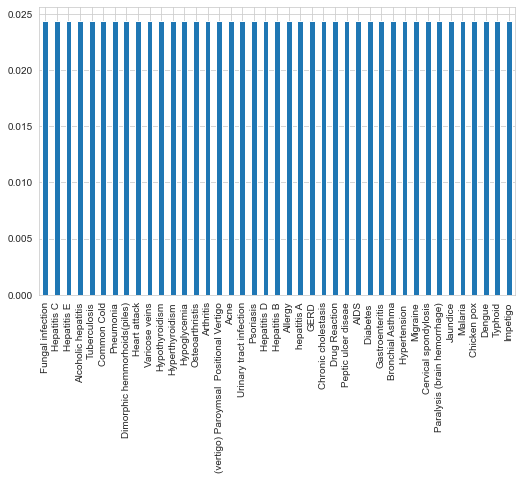

In [29]:
data['prognosis'].value_counts(normalize = True).plot.bar()
plt.subplots_adjust(left = 0.9, right = 2 , top = 2, bottom = 1)